# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.21.3


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generator (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1236916 
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [65 60 58 67 60 58 52 59 70 51]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


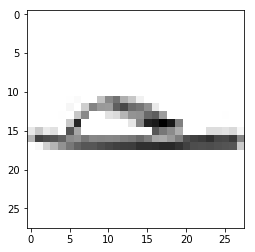

LABEL: 5
INPUT:


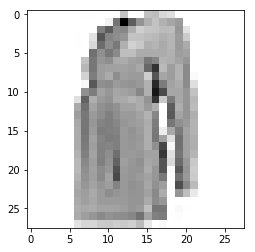

LABEL: 6
INPUT:


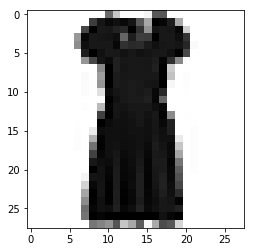

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (40,20,), (40,30,20) ]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE
clf_mlp = GridSearchCV(mlp, parameters, cv = 5)

clf_mlp.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf_mlp.best_params_)

best_1 =  clf_mlp.best_params_ 

print("Score with best parameters:")
#ADD YOUR CODE
print(clf_mlp.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
means_mlp = clf_mlp.cv_results_['mean_test_score']
print(means_mlp)

/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (40,)}
Score with best parameters:
0.7866666666666666

All scores on the grid:
[0.76166667 0.75666667 0.78666667 0.73166667 0.52666667]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!

parameters = {'batch_size': [1, 32, 100, 300, 480]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes= best_1['hidden_layer_sizes'],  
                    learning_rate_init=.1)

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#ADD YOUR CODE

# recall to use cv=kf in GridSearchCV parameters to use the k-fold subdivision seen in the lectures

#ADD YOUR CODE
clf_mlp = GridSearchCV(mlp, parameters, cv = kf)

clf_mlp.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf_mlp.best_params_)

best_2 = clf_mlp.best_params_

print("Score with best parameters:")
#ADD YOUR CODE
print(clf_mlp.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
means_mlp = clf_mlp.cv_results_['mean_test_score']
print(means_mlp)

RESULTS FOR NN

Best parameters set found:
{'batch_size': 300}
Score with best parameters:
0.7883333333333333

All scores on the grid:
[0.095      0.74833333 0.785      0.78833333 0.78333333]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]
For different architectures I observe that increasing the number of neurons for a single layer makes the algorithm more efficient, while increasing the number of layers makes the score decreasing. Indeed, the best architecture found is the one with a single layer with 40 neurons. 

For different batch sizes, I notice that for a batch of 1 the result score is very low, indeed using a batch of 1 makes the procedure very unstable. Increasing the batch size increases the score. The best batch size found is 300, which is not the greater one neither the lower. This result is what we expect, indeed I suppose that the best batch size could be in the middle between 1 and the dimension of a single split.

### TO DO 3

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate . 

In [10]:
import matplotlib.pyplot as plt

lr_list = [10**exp for exp in range(-3,0)]

#ADD YOUR CODE
mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    batch_size=best_2['batch_size'], hidden_layer_sizes= best_1['hidden_layer_sizes']) #(40,))

parameters = {'learning_rate_init': lr_list}


kf = sklearn.model_selection.KFold(n_splits=5)

clf_mlp = GridSearchCV(mlp, parameters, cv=kf)

clf_mlp.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf_mlp.best_params_)

best_3 = clf_mlp.best_params_

print("Score with best parameters:")
#ADD YOUR CODE
print(clf_mlp.best_score_)

/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimi

RESULTS FOR NN

Best parameters set found:
{'learning_rate_init': 0.1}
Score with best parameters:
0.7883333333333333


/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


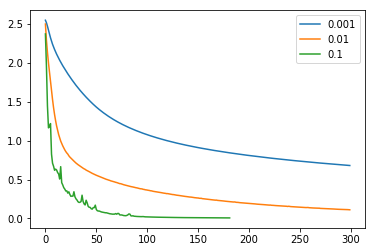

In [11]:
mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    batch_size=best_2['batch_size'], hidden_layer_sizes= best_1['hidden_layer_sizes'] ) #(40,) )

for m in lr_list:
    mlp.learning_rate_init =  m
    mlp.fit(X_train, y_train)
    plt.plot(mlp.loss_curve_, label = m)
    plt.legend()

### QUESTION 2

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 2]
For lower learning rates there is more stability: the curve does not oscillate. This happens for the value of the learning rate of 0.001 and 0.01. In these cases the algorithm does not reach convergence in the 300 iterations. The number of iterations should be greater than 300 if we want convergence in such cases. 
Increasing the learning rate, i.e. for the value of 0.1, the curve starts to oscillate but the algorithm reaches convergence for a value of steps like $\sim 70$.

### TO DO 4

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case.

RESULTS FOR NN

Best NN training error: 0.000000
Best NN test error: 0.202980


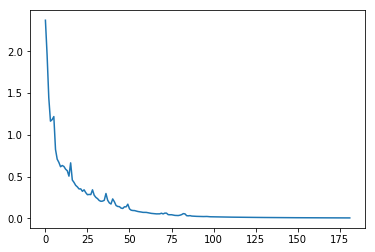

In [12]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
mlp_best = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    batch_size=best_2['batch_size'], hidden_layer_sizes=best_1['hidden_layer_sizes'],learning_rate_init= best_3['learning_rate_init'])


mlp_best.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

training_error = 1. - mlp_best.score(X_train,y_train)
test_error = 1. - mlp_best.score(X_test,y_test)


print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
plt.plot(mlp_best.loss_curve_)

## More data 
Now let's do the same but using 5000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer !!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [496 534 490 476 482 478 531 488 487 538]


## TO DO 5

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

Iteration 1, loss = 1.36047910
Iteration 2, loss = 0.79722558
Iteration 3, loss = 0.56830503
Iteration 4, loss = 0.49347418
Iteration 5, loss = 0.46020028
Iteration 6, loss = 0.41213402
Iteration 7, loss = 0.44501938
Iteration 8, loss = 0.38352460
Iteration 9, loss = 0.35723473
Iteration 10, loss = 0.35270959
Iteration 11, loss = 0.34217773
Iteration 12, loss = 0.32233538
Iteration 13, loss = 0.31198096
Iteration 14, loss = 0.31306606
Iteration 15, loss = 0.29380269
Iteration 16, loss = 0.28894880
Iteration 17, loss = 0.26728813
Iteration 18, loss = 0.26834252
Iteration 19, loss = 0.25976272
Iteration 20, loss = 0.25378106
Iteration 21, loss = 0.24002748
Iteration 22, loss = 0.23739894
Iteration 23, loss = 0.23229089
Iteration 24, loss = 0.23285878
Iteration 25, loss = 0.22516796
Iteration 26, loss = 0.21399322
Iteration 27, loss = 0.19875979
Iteration 28, loss = 0.19565475
Iteration 29, loss = 0.24630956
Iteration 30, loss = 0.20372619
Iteration 31, loss = 0.19144953
Iteration 32, los

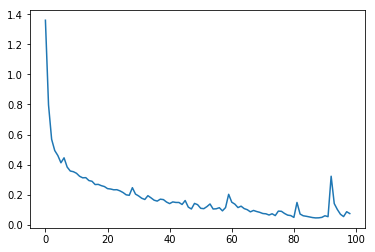

In [14]:
# use best architecture and params from before

#ADD YOUR CODE
large_mlp_best = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    batch_size=best_2['batch_size'], hidden_layer_sizes=best_1['hidden_layer_sizes'],learning_rate_init=best_3['learning_rate_init'], verbose=True, learning_rate = 'constant')


large_mlp_best.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

training_error = 1. - large_mlp_best.score(X_train,y_train)
test_error = 1. - large_mlp_best.score(X_test,y_test)


print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
plt.plot(large_mlp_best.loss_curve_)

## QUESTION 3
Compare the train and test errors you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

## [ANSWER TO QUESTION 3]

m_training | training error | test error
                           ---|------------|--------------
600  | 0.000000 | 0.202980
5000 | 0.014200 | 0.168709

I note that the training error for a m_training of 600 is lower than the case with 5000 samples. In particular, it is perfectly 0. It could be by chance, because we expect that increasing the m_training, the training error decreases. Or maybe, it could be fault of the very little number of samples in the dataset. In fact, it could happen that using only 600 samples, the algorithm overfit the dataset. This not happens increasing the number of samples. 
The test error shows the behaviour expected decreasing. 

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=5000 training data points.

In [15]:
NN_prediction = mlp_best.predict(X_test)

large_NN_prediction = large_mlp_best.predict(X_test)

print(NN_prediction)
print(large_NN_prediction)

missclassified = []
for i in range(0,len(y_test)):
    if (NN_prediction[i]!=y_test[i]) and (large_NN_prediction[i]==y_test[i]):
        missclassified.append(i)

print(len(missclassified))        

[2 0 0 ... 2 2 7]
[2 0 0 ... 2 2 5]
5280


Missclassified sample index: 11
NN_prediction: 4
large_NN_prediction: 6
y_test: 6
INPUT:


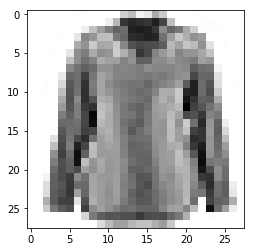

LABEL: 6
Missclassified sample index: 15
NN_prediction: 0
large_NN_prediction: 4
y_test: 4
INPUT:


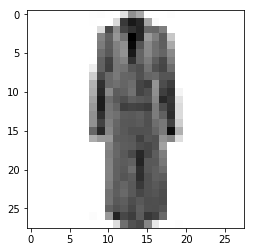

LABEL: 4
Missclassified sample index: 16
NN_prediction: 4
large_NN_prediction: 2
y_test: 2
INPUT:


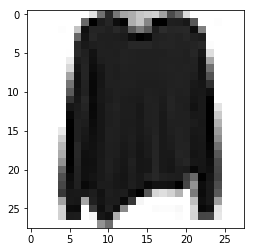

LABEL: 2
Missclassified sample index: 46
NN_prediction: 4
large_NN_prediction: 2
y_test: 2
INPUT:


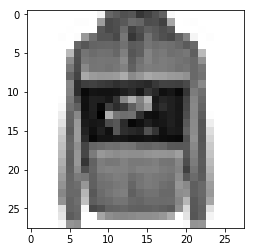

LABEL: 2
Missclassified sample index: 77
NN_prediction: 0
large_NN_prediction: 6
y_test: 6
INPUT:


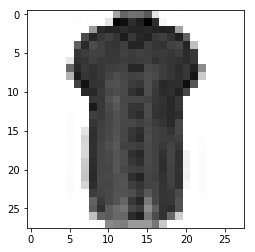

LABEL: 6
Missclassified sample index: 83
NN_prediction: 2
large_NN_prediction: 4
y_test: 4
INPUT:


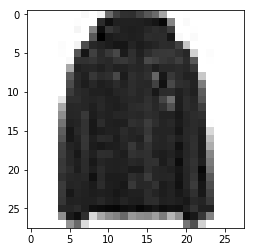

LABEL: 4
Missclassified sample index: 85
NN_prediction: 9
large_NN_prediction: 7
y_test: 7
INPUT:


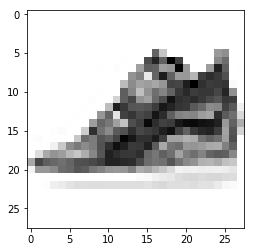

LABEL: 7
Missclassified sample index: 92
NN_prediction: 0
large_NN_prediction: 6
y_test: 6
INPUT:


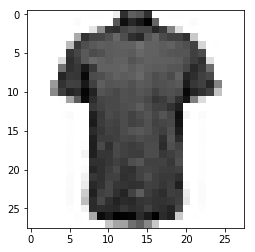

LABEL: 6


In [16]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

for index in missclassified[0:8]:
    print('Missclassified sample index:', index)
    print('NN_prediction:', NN_prediction[index])
    print('large_NN_prediction:', large_NN_prediction[index])
    print('y_test:', y_test[index])
    plot_input(X_test,y_test,index)

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 5000 data points. The code is already provided, just fix variable names (e.g., replace mlp ,  mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


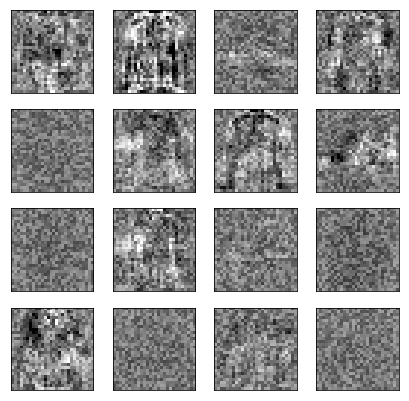

Weights with 5000 data points:


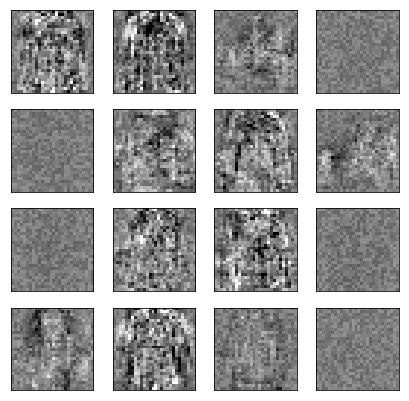

(784, 40)


In [17]:
# The code is already provided, fix variable names in order to have it working with your implementation

print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4,figsize=(7,7))
vmin, vmax = mlp_best.coefs_[0].min(), mlp_best.coefs_[0].max()
for coef, ax in zip(mlp_best.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4,figsize=(7,7))
vmin, vmax = large_mlp_best.coefs_[0].min(), large_mlp_best.coefs_[0].max()
for coef, ax in zip(large_mlp_best.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

print(large_mlp_best.coefs_[0].shape)

## QUESTION 4

Describe what do you observe by looking at the weights

## [ANSWER TO QUESTION 4]

Increasing the number of the training dataset the plot of the weights of the classifier becames less clear. Maybe it happens because the training set error in the case with m=600 is lesser than the error for m=5000. The coefficients represent the connection between the layer. 

### TO DO 9

Report the best SVM model and its parameters, you found in the last notebook (or check out the solution on the moodle webpage of the course). Fit it on a few data points and compute its training and test scores.

In [18]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

#ADD YOUR CODE
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

svc = SVC(kernel = 'rbf', C=5, gamma=0.005)

svc.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1. - svc.score(X_train,y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error =  1. - svc.score(X_test,y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.06920000000000004
Test score SVM:
0.1472


## QUESTION 5
Compare the results of SVM and of NN. Which one would you prefer? 

## [ANSWER TO QUESTION 5]

 model| training error | test error
                           ---|------------|--------------
NN  |  0.014200 | 0.168709
SVM | 0.069200  | 0.1472

I note that for the SVM the training error is greater than the NN model, while the test error is lesser. The most important result for the performance of an algorithm is the test error, so I prefer the SVM model which gives us a lower test error's value. 